# 利用神经网络的 Kera 预测学生录取情况

在该 notebook 中，我们基于以下三条数据预测了加州大学洛杉矶分校的研究生录取情况：

- GRE 分数（测试）即 GRE Scores (Test)

- GPA 分数（成绩）即 GPA Scores (Grades)

- 评级（1-4）即 Class rank (1-4)

数据集来源：http://www.ats.ucla.edu/

## 加载数据

为了加载数据并很好地进行格式化，我们将使用两个非常有用的包，即 Pandas 和 Numpy。 你可以在这里此文档：

- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


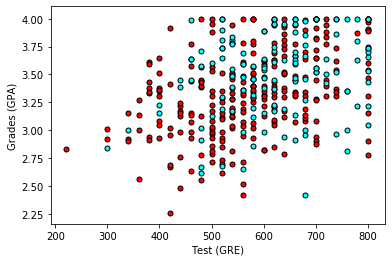

In [3]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

粗略地说，它看起来像是，成绩 （grades) 和测试(test) 分数 高的学生通过了，而得分低的学生却没有，但数据并没有如我们所希望的那样，很好地分离。 也许将评级 (rank) 考虑进来会有帮助？ 接下来我们将绘制 4 个图，每个图代表一个级别。

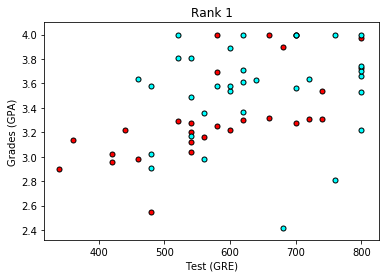

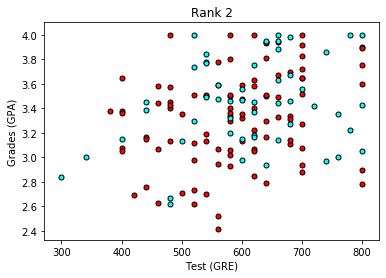

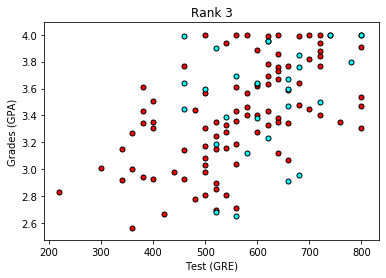

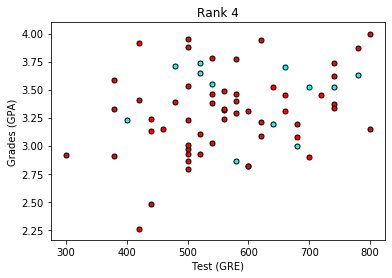

In [4]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

现在看起来更棒啦，看上去评级越低，录取率越高。 让我们使用评级 (rank) 作为我们的输入之一。 为了做到这一点，我们应该对它进行一次one-hot 编码。

## 将评级进行 One-hot 编码
我们将在 pandas 中使用 `get_dummies` 函数。

In [5]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1
5,1,760.0,3.00,0,1,0,0
6,1,560.0,2.98,1,0,0,0
7,0,400.0,3.08,0,1,0,0
8,1,540.0,3.39,0,0,1,0
9,0,700.0,3.92,0,1,0,0


In [6]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data[:10]

,admit,gre,gpa,rank_1.0,rank_2.0,rank_3.0,rank_4.0
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [7]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1.0  rank_2.0  rank_3.0  rank_4.0
15       0  0.600  0.8600         0         0         1         0
26       1  0.775  0.9025         1         0         0         0
393      1  0.775  0.9375         0         1         0         0
226      0  0.775  0.8950         0         1         0         0
159      0  0.875  0.9550         0         0         1         0
122      0  0.650  0.7125         0         0         1         0
201      1  0.725  0.8000         0         1         0         0
255      0  0.800  0.8375         0         0         1         0
117      0  0.875  0.9300         0         1         0         0
64       0  0.725  1.0000         0         0         1         0
     admit    gre     gpa  rank_1.0  rank_2.0  rank_3.0  rank_4.0
13       0  0.875  0.7700         0         1         0         0
24       1  0.950  0.8375         0         1         0         0
59       0

## 将数据分成特征和目标（标签）
现在，在培训前的最后一步，我们将把数据分为特征 (features)（X）和目标 (targets)（y）。

另外，在 Keras 中，我们需要对输出进行 one-hot 编码。 我们将使用`to_categorical function` 来做到这一点。

In [8]:
import keras

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features[:10])
print(targets[:10])

Using TensorFlow backend.
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorflow/py

[[0.6    0.86   0.     0.     1.     0.    ]
 [0.775  0.9025 1.     0.     0.     0.    ]
 [0.775  0.9375 0.     1.     0.     0.    ]
 [0.775  0.895  0.     1.     0.     0.    ]
 [0.875  0.955  0.     0.     1.     0.    ]
 [0.65   0.7125 0.     0.     1.     0.    ]
 [0.725  0.8    0.     1.     0.     0.    ]
 [0.8    0.8375 0.     0.     1.     0.    ]
 [0.875  0.93   0.     1.     0.     0.    ]
 [0.725  1.     0.     0.     1.     0.    ]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


/home/leon/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/leon/anaconda3/lib/python3.7/site-packages/tensorboard/compat

## 定义模型架构
我们将使用 Keras 来构建神经网络。

In [9]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


## 训练模型

In [13]:
# Training the model
model.fit(features, targets, epochs=1000, batch_size=100, verbose=0)

## 模型评分

In [14]:
# Evaluating the model on the training and testing set
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score[1])
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1])

360/360 [==============================] - 0s 10us/step

 Training Accuracy: 0.6805555820465088
40/40 [==============================] - 0s 21us/step

 Testing Accuracy: 0.699999988079071


## 练习：玩转参数

你可以看到我们在训练过程中做了几个规定。 例如，对图层的数量，图层的大小，epoch 的数量等有所规定。
现在轮到你来玩转参数！ 你能提高准确性吗？ 以下是针对这些参数的其他建议。 我们将在课程后面学习如下概念的定义：

- 激活函数 (Activation function)：relu 和 sigmoid
- 损失函数 (Loss function)：categorical_crossentropy，mean_squared_error
- 优化器 (Optimizer)：rmsprop，adam，ada